In [1]:
# import libraries
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [2]:
# Runga Kutta integrator

# perform runga-kutta method for a problem with 2 spacial dimensions (x and y) and 2nd order differential equations 
# any function can be passed as input for the forces acting on the system. (x and y separately)
def runga_kutta_2d(position, velocity, timestep, Fx, Fy, args_x, args_y):
    # position = (x_n, y_n): the x and y position at time n
    # velocity = (Vx_n, Vy_n): the velocity vector components for x and y at time n
    # timestep: delta(t), interval of time between 2 approximations
    # F_x: the derivative function for the x velocity component
    # F_y: the derivation function for the y velocity component
    # args_x: arguments to be passed to F_x (in addition to Vx, Vy, x, y)
    # args_y: arguments to be passed to F_y (in addition to Vx, Vy, x, y)
    
    # initialization
    x_values = []
    y_values = []
    Vx_values = []
    Vy_values = []
    Fx_values = []
    Fy_values = []
    
    # step 1
    x_values.append(position[0])
    y_values.append(position[1])
    
    Vx_values.append(velocity[0])
    Vy_values.append(velocity[1])
    
    Fx_values.append(Fx(args_x, Vx_values[0], Vy_values[0], x_values[0], y_values[0]))
    Fy_values.append(Fy(args_y, Vx_values[0], Vy_values[0], x_values[0], y_values[0]))
    
    # step 2
    x_values.append(x_values[0] + Vx_values[0] * timestep/2)
    y_values.append(y_values[0] + Vy_values[0] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[0] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[0] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[1], Vy_values[1], x_values[1], y_values[1]))
    Fy_values.append(Fy(args_y, Vx_values[1], Vy_values[1], x_values[1], y_values[1]))
    
    # step 3
    x_values.append(x_values[0] + Vx_values[1] * timestep/2)
    y_values.append(y_values[0] + Vy_values[1] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[1] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[1] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[2],Vy_values[2], x_values[2], y_values[2]))
    Fy_values.append(Fy(args_y, Vx_values[2],Vy_values[2], x_values[2], y_values[2]))
    
    # step 4
    x_values.append(x_values[0] + Vx_values[2] * timestep)
    y_values.append(y_values[0] + Vy_values[2] * timestep)
    
    Vx_values.append(Vx_values[0] + Fx_values[2] * timestep)
    Vy_values.append(Vy_values[0] + Fy_values[2] * timestep)
    
    Fx_values.append(Fx(args_x, Vx_values[3],Vy_values[3], x_values[3], y_values[3]))
    Fy_values.append(Fy(args_y, Vx_values[3],Vy_values[3], x_values[3], y_values[3]))
    
    # step 5
    x_final = x_values[0] + ((Vx_values[0] + 2*Vx_values[1] + 2*Vx_values[2] + Vx_values[3])*timestep)/6
    y_final = y_values[0] + ((Vy_values[0] + 2*Vy_values[1] + 2*Vy_values[2] + Vy_values[3])*timestep)/6
    Vx_final = Vx_values[0] + ((Fx_values[0] +2*Fx_values[1] +2*Fx_values[2] + Fx_values[3])*timestep)/6
    Vy_final = Vy_values[0] + ((Fy_values[0] +2*Fy_values[1] +2*Fy_values[2] + Fy_values[3])*timestep)/6
    
    return (x_final, y_final), (Vx_final, Vy_final)

In [3]:
# functions for derivative of velocity   
    
def baseball_no_wind_x(rho, Vx, Vy, x, y):
    v = math.sqrt(Vx**2 + Vy**2)
    B2_m = 0.0039 + (0.0058)/(1 + math.exp((v-35)/5)) # based on formula (2.26) in book (page 33)
    return - B2_m *(rho/rho_sea_level) * v * Vx

def baseball_no_wind_y(args_y, Vx, Vy, x, y):
    # args_y = (g, rho)
    g = args_y[0]
    rho = args_y[1]
    v = math.sqrt(Vx**2 + Vy**2)
    B2_m = 0.0039 + (0.0058)/(1 + math.exp((v-35)/5)) # based on formula (2.26) in book (page 33)
    return - g - (B2_m * (rho/rho_sea_level) * v * Vy)

# only for tail wind and x wind: velocity of wind only has an x component
def baseball_with_wind_x(args_x, Vx, Vy, x, y):
    #args_x = (rho, v_wind)
    rho = args_x[0]
    v_wind = args_x[1] # if tail wind, v_wind > 0 | if head wind, v_wind < 0
    tmp_v = math.sqrt(Vy**2 + (Vx-v_wind)**2) # because we only consider tail or head wind, which have x component only
    B2_m = 0.0039 + ((0.0058)/(1 + math.exp(tmp_v - 35)/5))
    return - B2_m *(rho/rho_sea_level) * tmp_v * (Vx - v_wind)

def baseball_with_wind_y(args_y, Vx, Vy, x, y):
    # args_y = (g, rho, v_wind)
    g = args_y[0]
    rho = args_y[1]
    v_wind = args_y[2]
    tmp_v = math.sqrt(Vy**2 + (Vx-v_wind)**2)
    B2_m = 0.0039 + ((0.0058)/(1 + math.exp(tmp_v - 35)/5))
    return - g - (B2_m * (rho/rho_sea_level) * tmp_v * Vy)

In [4]:
# constants
rho_sea_level = 1.225 # kg/m^3, air density at sea level
baseball_ball_diameter = 0.07366 # in meter, or 2.9 inches
A = math.pi * (baseball_ball_diameter/2)**2 # cross sectional area of baseball ball
baseball_ball_mass = 0.145 # kg, approximation

In [5]:
# helper functions, convert between different units
def mph_to_meter_per_second(velocity):
    return velocity/2.2369

def meter_per_second_to_mph(velocity):
    return velocity*2.2369

def feet_to_meter(distance):
    return distance/3.281

# Question 2.13 (a): Calculate maximum range 
1) at sea level \
2) with no wind \
3) with initial velocity of 110mph

Choices made:
- timestep of 0.1 second (seems to be precise enough on the plots)
- will iterate for all initial angles between 1° and 90°
- at sea level, density of air is "rho_sea_level" (previously defined)

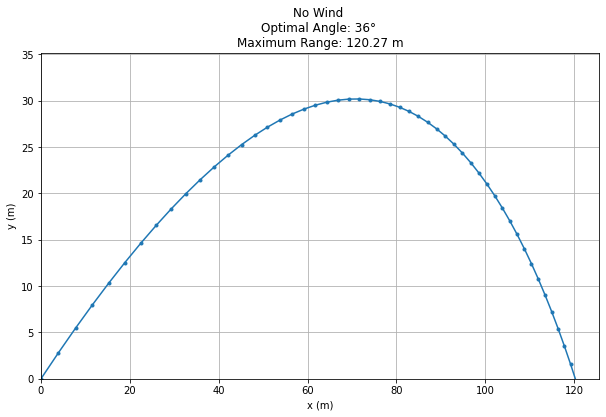

In [63]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(110)
min_angle = 1
max_angle = 90
timestep = 0.1 # seconds

# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# stores all initial angles
all_angles = []

for angle in range(min_angle, max_angle):
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_no_wind_x, baseball_no_wind_y, rho_sea_level, (9.8, rho_sea_level))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)

    # calculate x final as showed in the book page 28 (2.21)
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    all_x_landing.append(x_landing)
    
    all_angles.append(angle)
    
# get the maximum range and optimal angle
max_range = max(all_x_landing)
optimal_angle = all_angles[np.argmax(np.array(all_x_landing))]

# plot the corresponding trajectory
index = all_angles.index(optimal_angle)
plt.figure(figsize = (10,6))
plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
plt.title("No Wind \nOptimal Angle: %s° \nMaximum Range: %0.2f m"%(optimal_angle, max_range))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.ylim(0,max(all_y_trajectories[index]) + 5)
plt.xlim(0,max(all_x_trajectories[index]) + 5)
plt.show()

# Question 2.13 (b): Determine the initial angles that give a maximum range

1) at sea level \
2) with taild wind OR head wind of 25mph \
3) with initial velocity of 110mph

Choices made:
- timestep of 0.1 second (seems to be precise enough on the plots)
- will iterate for all initial angles between 1° and 90°
- at sea level, density of air is "rho_sea_level" (previously defined)
- head wind is -25mph and tail wind is 25mph (only influences x component of velocity)

In [64]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(110)
min_angle = 0
max_angle = 90
timestep = 0.1

v_wind = mph_to_meter_per_second(25)

## A) Tail wind

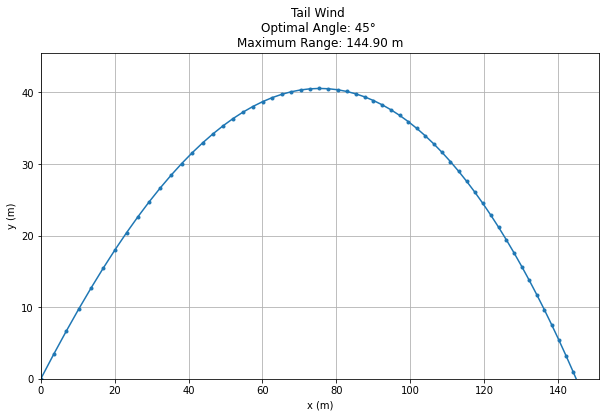

In [67]:
# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# stores all initial angles
all_angles = []

for angle in range(min_angle, max_angle):
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_with_wind_x, baseball_with_wind_y, (rho_sea_level, v_wind), (9.8, rho_sea_level, v_wind))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)
    
    # calculate x final as showed in the book page 28
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    
    all_x_landing.append(x_landing)
    all_angles.append(angle)
    
# get the maximum range and optimal angle
max_range = max(all_x_landing)
optimal_angle = all_angles[np.argmax(np.array(all_x_landing))]

# plot the corresponding trajectory
index = all_angles.index(optimal_angle)
plt.figure(figsize = (10,6))
plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
plt.title("Tail Wind \nOptimal Angle: %s° \nMaximum Range: %0.2f m"%(optimal_angle, max_range))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.ylim(0,max(all_y_trajectories[index]) + 5)
plt.xlim(0,max(all_x_trajectories[index]) + 5)
plt.show()

## B) Head wind

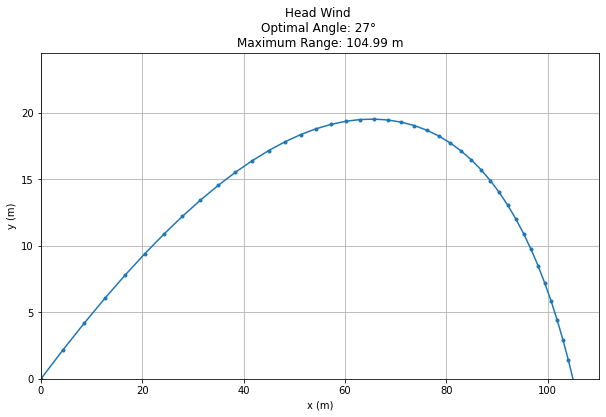

In [69]:
# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# stores all initial angles
all_angles = []

for angle in range(min_angle, max_angle):
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_with_wind_x, baseball_with_wind_y, (rho_sea_level, -v_wind), (9.8, rho_sea_level, -v_wind))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)
    
    # calculate x final as showed in the book page 28
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    
    all_x_landing.append(x_landing)
    all_angles.append(angle)
    
# get the maximum range and optimal angle
max_range = max(all_x_landing)
optimal_angle = all_angles[np.argmax(np.array(all_x_landing))]

# plot the corresponding trajectory
index = all_angles.index(optimal_angle)
plt.figure(figsize = (10,6))
plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
plt.title("Head Wind \nOptimal Angle: %s° \nMaximum Range: %0.2f m"%(optimal_angle, max_range))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.ylim(0,max(all_y_trajectories[index]) + 5)
plt.xlim(0,max(all_x_trajectories[index]) + 5)
plt.show()

# Question 2.13 (c): Determine the initial angles that give a maximum range

1) with initial velocity of 100mph AND 120mph

Choices made:
- Assume it is at sea level (density of air is "rho_sea_level" (previously defined))
- Assume there is no wind
- Assume it is a normal baseball ball
- timestep of 0.1 second (seems to be precise enough on the plots)
- we will find the optimal angle for both initial velocities by iterating all initial angles between 1° and 90°

## A) Initial velocity of 100 mph

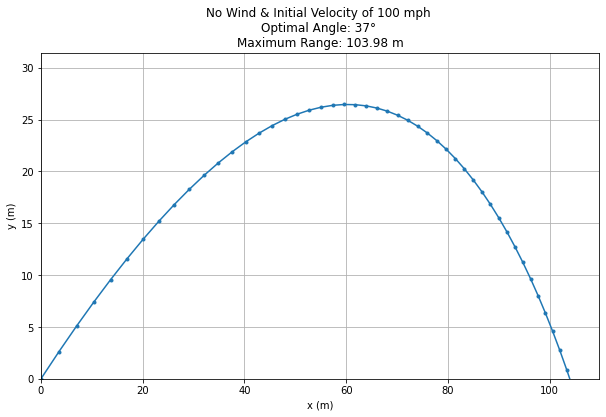

In [71]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(100)
min_angle = 0
max_angle = 90
timestep = 0.1

# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# stores all initial angles
all_angles = []

for angle in range(min_angle, max_angle):
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_no_wind_x, baseball_no_wind_y, rho_sea_level, (9.8, rho_sea_level))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)

    # calculate x final as showed in the book page 28
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    
    all_x_landing.append(x_landing)
    all_angles.append(angle)
    
# get the maximum range and optimal angle
max_range = max(all_x_landing)
optimal_angle = all_angles[np.argmax(np.array(all_x_landing))]

# plot the corresponding trajectory
index = all_angles.index(optimal_angle)
plt.figure(figsize = (10,6))
plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
plt.title("No Wind & Initial Velocity of 100 mph \nOptimal Angle: %s° \nMaximum Range: %0.2f m"%(optimal_angle, max_range))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.ylim(0,max(all_y_trajectories[index]) + 5)
plt.xlim(0,max(all_x_trajectories[index]) + 5)
plt.show()

## A) Initial velocity of 120 mph

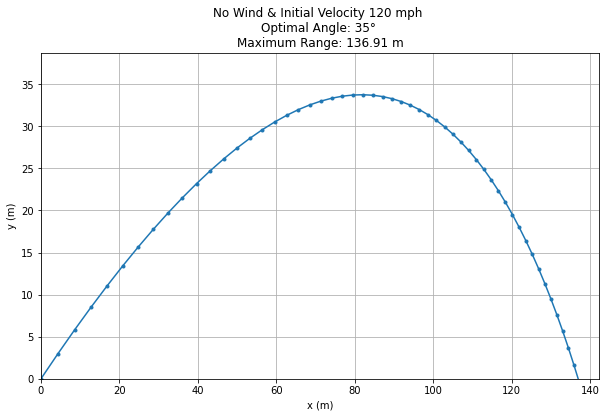

In [73]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(120)
min_angle = 0
max_angle = 90
timestep = 0.1

# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# stores all initial angles
all_angles = []

for angle in range(min_angle, max_angle):
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_no_wind_x, baseball_no_wind_y, rho_sea_level, (9.8, rho_sea_level))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)

    # calculate x final as showed in the book page 28
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    
    all_x_landing.append(x_landing)
    all_angles.append(angle)
    
# get the maximum range and optimal angle
max_range = max(all_x_landing)
optimal_angle = all_angles[np.argmax(np.array(all_x_landing))]

# plot the corresponding trajectory
index = all_angles.index(optimal_angle)
plt.figure(figsize = (10,6))
plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
plt.title("No Wind & Initial Velocity 120 mph \nOptimal Angle: %s° \nMaximum Range: %0.2f m"%(optimal_angle, max_range))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.ylim(0,max(all_y_trajectories[index]) + 5)
plt.xlim(0,max(all_x_trajectories[index]) + 5)
plt.show()

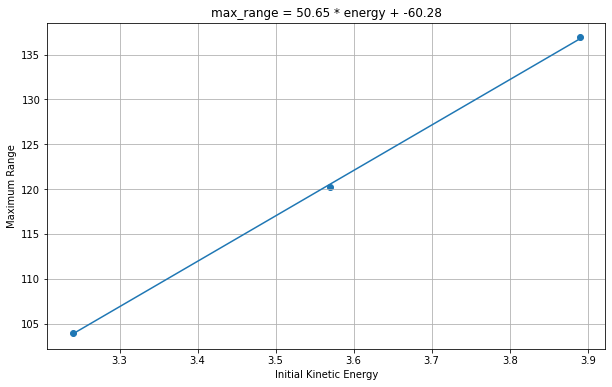

In [86]:
energy = [3.24, 3.57, 3.89]
max_range = [103.98, 120.27, 136.91]
m,b = np.polyfit(energy, max_range, 1)

plt.figure(figsize = (10,6))
plt.scatter(energy, max_range)
plt.plot(energy, [m*e + b for e in energy])
plt.title("max_range = %0.2f * energy + %0.2f"%(m, b))
plt.xlabel("Initial Kinetic Energy")
plt.ylabel("Maximum Range")
plt.grid()
plt.show()

# Question 2.13 (d): Calculate how much a fastball slows down on its way to home plate. 

Assume: \
1) A pitch that leaves the pitcher hand at 100 mph \
2) The homeplace is 60.5 ft away

Choices made:
- Assume it is at sea level (density of air is "rho_sea_level" (previously defined))
- Assume there is no wind
- Assume it is a normal baseball ball
- timestep of 0.1 second (seems to be precise enough on the plots)
- We will use an error of +- 0.05 m to get all trajectories which landing point is +- 0.05 m away from homeplate

Range: 18.40
Initial angle: 2.78
Final velocity: 41.09


Range: 18.44
Initial angle: 84.56
Final velocity: 27.08




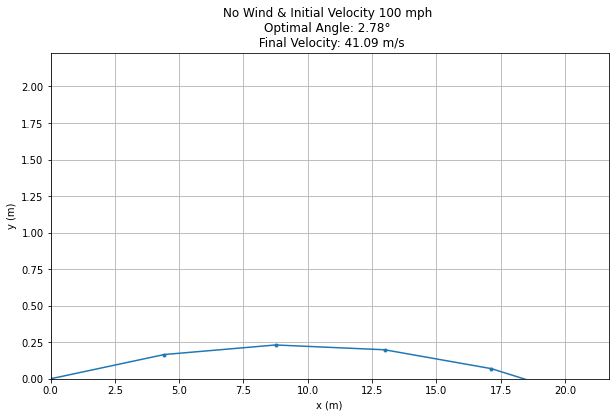

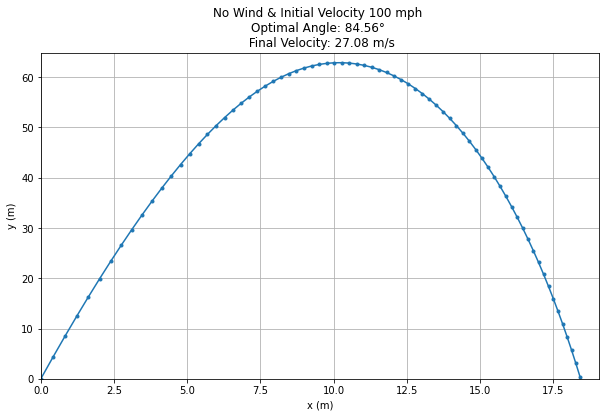

In [92]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(100)
min_angle = 0
max_angle = 90

timestep = 0.1
home_plate = feet_to_meter(60.5)
error = 0.05 # in meter, assuming an error of 0.01 for hoe plate distance

# store all x and y data points for all calculated trajectories
all_x_trajectories = []
all_y_trajectories = []
all_Vx_trajectories = []
all_Vy_trajectories = []

# store landing points for all calculated trajectories
all_x_landing = []

# store all initial angles
all_angles = [min_angle]
a = min_angle
while a < max_angle:
    a += 0.02
    all_angles.append(a)

for angle in all_angles:
    # stores x and y values for a specific trajectory
    x_trajectory = []
    y_trajectory = []
    Vx_trajectory = []
    Vy_trajectory = []
    
    initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
    
    p_components = initial_position
    v_components = initial_velocity_components
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    Vx_trajectory.append(v_components[0])
    Vy_trajectory.append(v_components[1])
    begin = True
    
    while y_trajectory[-1] > 0 or begin == True:
        begin = False
        p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_no_wind_x, baseball_no_wind_y, rho_sea_level, (9.8, rho_sea_level))
        x_trajectory.append(p_components[0])
        y_trajectory.append(p_components[1])
        Vx_trajectory.append(v_components[0])
        Vy_trajectory.append(v_components[1])
        
    all_x_trajectories.append(x_trajectory)
    all_y_trajectories.append(y_trajectory)
    all_Vx_trajectories.append(Vx_trajectory)
    all_Vy_trajectories.append(Vy_trajectory)

    # calculate x final as showed in the book page 28
    x_n = x_trajectory[-2]
    x_n_1 = x_trajectory[-1]
    y_n = y_trajectory[-2]
    y_n_1 = y_trajectory[-1]
    r =  ((-y_n)/(y_n_1))
    x_landing = (x_n + r * x_n_1) / (r + 1)
    
    all_x_landing.append(x_landing)
    
indexes = []
final_velocities = {}
# get the trajectory landing 60.5 feet away
for i in range(len(all_x_landing)):
    if all_x_landing[i] > home_plate - error and all_x_landing[i] < home_plate + error:
        print("Range: %0.2f"%(all_x_landing[i]))
        print("Initial angle: %0.2f"%(all_angles[i]))
        final_velocity = math.sqrt((all_Vx_trajectories[i][-2])**2 + (all_Vy_trajectories[i][-2])**2)
        print("Final velocity: %0.2f"%(final_velocity))
        print("")
        print()
        indexes.append(i)
        final_velocities[i] = final_velocity

# plot the corresponding trajectories
for index in indexes:
    plt.figure(figsize = (10,6))
    plt.plot(all_x_trajectories[index], all_y_trajectories[index], marker = '.')
    plt.title("No Wind & Initial Velocity 100 mph \nOptimal Angle: %0.2f° \n Final Velocity: %0.2f m/s"%(all_angles[index], final_velocities[index]))
    plt.ylabel("y (m)")
    plt.xlabel("x (m)")
    plt.grid()
    plt.ylim(0,max(all_y_trajectories[index]) + 2)
    plt.xlim(0,max(all_x_trajectories[index]) + 0.5)
    plt.show()

# Question 2.14 : How much will a crosswind of 10 mph alter the place where one of the fly balls in figure 2.7 lands?

Choices made:
- Assume it is at sea level (density of air is "rho_sea_level" (previously defined))
- Assume there is no taild wind or head wind
- Assume it is a normal baseball ball
- timestep of 0.1 second (seems to be precise enough on the plots)
- initial velocity of 120 mph
- initial angle of 36°

In [95]:
# perform runga-kutta method for a problem with 3 spacial dimensions (x and y, and z) 
# any function can be passed as input for the forces acting on the system.
def runga_kutta_3d(position, velocity, timestep, Fx, Fy, Fz, args_x, args_y, args_z):
    # position = (x_n, y_n, z_n): the x, y and z position at time n
    # velocity = (Vx_n, Vy_n, Vz_n): the velocity vector components for x, y and z at time n
    # timestep: delta(t), interval of time between 2 approximations
    # F_x: the derivative function for x component of velocity
    # F_y: the derivation function for y component of velocity
    # F_z: the derivation function for z component of velocity
    # args_x: arguments to be passed to F_x (in addition to Vx, Vy, Vz, x, y, z)
    # args_y: arguments to be passed to F_y (in addition to Vx, Vy, Vz, x, y, z)
    # args_z: arguments to be passed to F_z (in addition to Vx, Vy, Vz, x, y, z)
    
    x_values = []
    y_values = []
    z_values = []
    
    Vx_values = []
    Vy_values = []
    Vz_values = []
    
    Fx_values = []
    Fy_values = []
    Fz_values = []
    
    # step 1
    x_values.append(position[0])
    y_values.append(position[1])
    z_values.append(position[2])
    
    Vx_values.append(velocity[0])
    Vy_values.append(velocity[1])
    Vz_values.append(velocity[2])
    
    Fx_values.append(Fx(args_x, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fy_values.append(Fy(args_y, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fz_values.append(Fz(args_z, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    
    # step 2
    x_values.append(x_values[0] + Vx_values[0] * timestep/2)
    y_values.append(y_values[0] + Vy_values[0] * timestep/2)
    z_values.append(z_values[0] + Vz_values[0] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[0] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[0] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[0] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fy_values.append(Fy(args_y, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fz_values.append(Fz(args_z, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    
    # step 3
    x_values.append(x_values[0] + Vx_values[1] * timestep/2)
    y_values.append(y_values[0] + Vy_values[1] * timestep/2)
    z_values.append(z_values[0] + Vz_values[1] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[1] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[1] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[1] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fy_values.append(Fy(args_y, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fz_values.append(Fz(args_z, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    
    # step 4
    x_values.append(x_values[0] + Vx_values[2] * timestep)
    y_values.append(y_values[0] + Vy_values[2] * timestep)
    z_values.append(z_values[0] + Vz_values[2] * timestep)
    
    Vx_values.append(Vx_values[0] + Fx_values[2] * timestep)
    Vy_values.append(Vy_values[0] + Fy_values[2] * timestep)
    Vz_values.append(Vz_values[0] + Fz_values[2] * timestep)
    
    Fx_values.append(Fx(args_x, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fy_values.append(Fy(args_y, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fz_values.append(Fz(args_z, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    
    # step 5
    x_final = x_values[0] + ((Vx_values[0] + 2*Vx_values[1] + 2*Vx_values[2] + Vx_values[3])*timestep)/6
    y_final = y_values[0] + ((Vy_values[0] + 2*Vy_values[1] + 2*Vy_values[2] + Vy_values[3])*timestep)/6
    z_final = z_values[0] + ((Vz_values[0] + 2*Vz_values[1] + 2*Vz_values[2] + Vz_values[3])*timestep)/6
    
    Vx_final = Vx_values[0] + ((Fx_values[0] +2*Fx_values[1] +2*Fx_values[2] + Fx_values[3])*timestep)/6
    Vy_final = Vy_values[0] + ((Fy_values[0] +2*Fy_values[1] +2*Fy_values[2] + Fy_values[3])*timestep)/6
    Vz_final = Vz_values[0] + ((Fz_values[0] +2*Fz_values[1] +2*Fz_values[2] + Fz_values[3])*timestep)/6
    
    return (x_final, y_final, z_final), (Vx_final, Vy_final, Vz_final)

In [96]:
def baseball_crosswind_x(args_x, Vx, Vy, Vz, x, y, z):
    rho = args_x[0]
    v_wind = args_x[1]
    tmp_v = math.sqrt(Vy**2 + Vx**2 +(Vz-v_wind)**2)
    B2_m = 0.0039 + (0.0058)/(1 + math.exp((tmp_v-35)/5))
    return - B2_m *(rho/rho_sea_level) * tmp_v * Vx

def baseball_crosswind_y(args_y, Vx, Vy, Vz, x, y, z):
    # args_y = (g, rho)
    g = args_y[0]
    rho = args_y[1]
    v_wind = args_y[2]
    # v = math.sqrt(Vx**2 + Vy**2 + Vz**2)
    tmp_v = math.sqrt(Vy**2 + Vx**2 +(Vz-v_wind)**2)
    B2_m = 0.0039 + (0.0058)/(1 + math.exp((tmp_v-35)/5))
    return - g - (B2_m * (rho/rho_sea_level) * tmp_v * Vy)

def baseball_crosswind_z(args_x, Vx, Vy, Vz, x, y, z):
    #args_x = (rho, v_wind)
    rho = args_x[0]
    v_wind = args_x[1]
    tmp_v = math.sqrt(Vy**2 + Vx**2 +(Vz-v_wind)**2)
    B2_m = 0.0039 + (0.0058)/(1 + math.exp((tmp_v -35)/5))
    return - B2_m *(rho/rho_sea_level) * tmp_v * (Vz - v_wind)

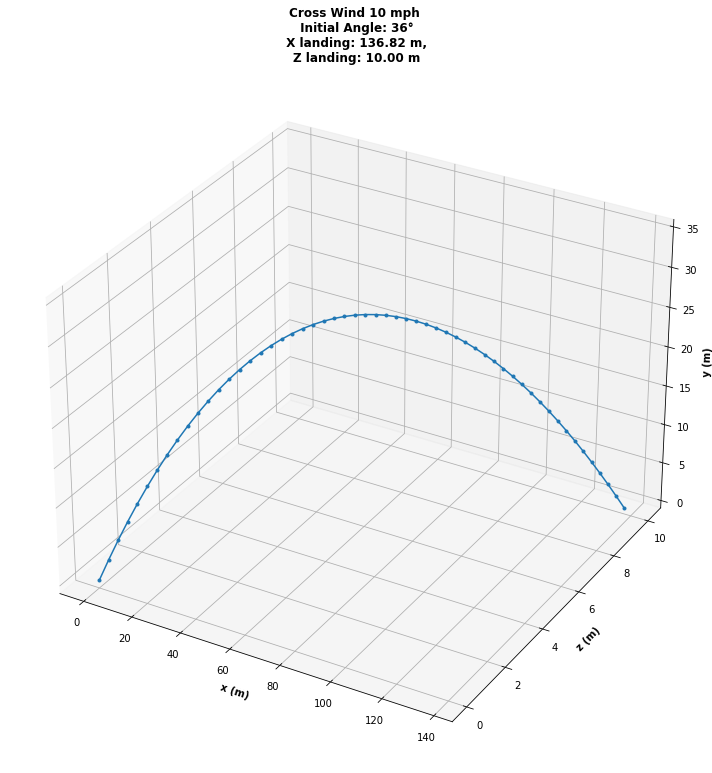

In [100]:
# initial conditions common to all calculations
initial_position = (0,0,0)
initial_velocity = mph_to_meter_per_second(120)
angle = 36
timestep = 0.1
v_wind =  mph_to_meter_per_second(10)

# stores x and y values for the specific trajectory
x_trajectory = []
y_trajectory = []
z_trajectory = []

initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)), 0)

p_components = initial_position
v_components = initial_velocity_components
x_trajectory.append(p_components[0])
y_trajectory.append(p_components[1])
z_trajectory.append(p_components[2])
begin = True

while y_trajectory[-1] > 0 or begin == True:
    begin = False
    p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, baseball_crosswind_x, baseball_crosswind_y, baseball_crosswind_z, (rho_sea_level, v_wind), (9.8, rho_sea_level, v_wind), (rho_sea_level, v_wind))
    x_trajectory.append(p_components[0])
    y_trajectory.append(p_components[1])
    z_trajectory.append(p_components[2])

# calculate x final as showed in the book page 28
x_n = x_trajectory[-2]
x_n_1 = x_trajectory[-1]
y_n = y_trajectory[-2]
y_n_1 = y_trajectory[-1]
r =  ((-y_n)/(y_n_1))
x_landing = (x_n + r * x_n_1) / (r + 1)

# now calculate z final
z_n = z_trajectory[-2]
z_n_1 = z_trajectory[-1]
y_n = y_trajectory[-2]
y_n_1 = y_trajectory[-1]
r =  ((-y_n)/(y_n_1))
z_landing = (z_n + r * z_n_1) / (r + 1)

# plot the corresponding trajectory
# invert y and z in the function to set the y axis vertically
fig = plt.figure(figsize = (10, 12))
ax = plt.axes(projection='3d')
ax.plot3D(x_trajectory, z_trajectory, y_trajectory, marker = '.')
ax.set_xlabel('x (m)', fontweight='bold')
ax.set_ylabel('z (m)', fontweight='bold')
ax.set_zlabel('y (m)', fontweight='bold')
ax.set_title("Cross Wind 10 mph \n Initial Angle: %s° \n X landing: %0.2f m, \nZ landing: %0.2f m"%(angle, x_landing, z_landing), fontweight='bold')
plt.tight_layout()
plt.show()

# Question 2.15: Calculate the range for the smooth and rough balls described by the drag function in figure 2.6

Choices made:
- Assume it is at sea level (density of air is "rho_sea_level" (previously defined))
- Assume there is no wind
- timestep of 0.1 second (seems to be precise enough on the plots)
- initial velocity of 160 mph
- initial angle of 35°
- we will estimate the function for the drag coefficient based on velocity of the ball using figure 2.6 in the book (page 33)

In [101]:
# return the drag coefficient for a rough ball at at velocity v
def get_drag_coeff_rough_ball(v):
     # v in mph
    if v <= 50:
        return 0.5
    elif 50 < v <= 75:
        return -0.0164 * v + 1.32
    elif 75 < v <= 100:
        return 0.0084 * v - 0.54 
    else:
        return 0.0016 * v + 0.14

# return the drag coefficient for a smooth ball at at velocity v
def get_drag_coeff_smooth_ball(v):
    # v in mph
    if v <= 140:
        return 0.5
    else:
        return -0.007 * v + 1.48
    
def baseball_x_type_ball(args_x, Vx, Vy, x, y):
    rho = args_x[0]
    type_ball = args_x[1]
    A = args_x[2]
    m = args_x[3]
    v = math.sqrt(Vx**2 + Vy**2)
    if type_ball == 'rough':
        C = get_drag_coeff_rough_ball(v)
    else:
        C = get_drag_coeff_smooth_ball(v)
    return -((C*rho*A)/(2*m)) * v * Vx

def baseball_y_type_ball(args_y, Vx, Vy, x, y):
    g = args_y[0]
    rho = args_y[1]
    type_ball = args_y[2]
    A = args_y[3]
    m = args_y[4]
    v = math.sqrt(Vx**2 + Vy**2)
    if type_ball == 'rough':
        C = get_drag_coeff_rough_ball(v)
    else:
        C = get_drag_coeff_smooth_ball(v)
    return - g -((C*rho*A)/(2*m)) * v * Vy


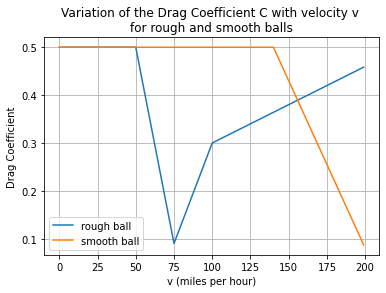

In [105]:
# draw functions for rough and smooth balls

v = range(200) # mph
drag_coeff_rough = []
drag_coeff_smooth = []
for v_elem in v:
    drag_coeff_rough.append(get_drag_coeff_rough_ball(v_elem))
    drag_coeff_smooth.append(get_drag_coeff_smooth_ball(v_elem))

plt.plot(v, drag_coeff_rough, label = 'rough ball')
plt.plot(v, drag_coeff_smooth, label = 'smooth ball')
plt.title("Variation of the Drag Coefficient C with velocity v \nfor rough and smooth balls")
plt.ylabel("Drag Coefficient")
plt.xlabel("v (miles per hour)")
plt.grid()
plt.legend()
plt.show()

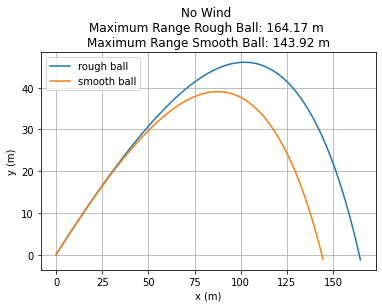

In [109]:
# initial conditions common to all calculations
initial_position = (0,0)
initial_velocity = mph_to_meter_per_second(160)
angle = 35
initial_velocity_components = (initial_velocity * math.cos(math.radians(angle)), initial_velocity * math.sin(math.radians(angle)))
timestep = 0.1

# rough ball
x_trajectory_rough_ball = []
y_trajectory_rough_ball = []

p_components = initial_position
v_components = initial_velocity_components
x_trajectory_rough_ball.append(p_components[0])
y_trajectory_rough_ball.append(p_components[1])

begin = True
while y_trajectory_rough_ball[-1] > 0 or begin == True:
    begin = False
    p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_x_type_ball, baseball_y_type_ball, (rho_sea_level, 'rough', A, baseball_ball_mass), (9.8, rho_sea_level, 'rough', A, baseball_ball_mass))
    x_trajectory_rough_ball.append(p_components[0])
    y_trajectory_rough_ball.append(p_components[1])

# calculate x final as showed in the book page 28
x_n = x_trajectory_rough_ball[-2]
x_n_1 = x_trajectory_rough_ball[-1]
y_n = y_trajectory_rough_ball[-2]
y_n_1 = y_trajectory_rough_ball[-1]
r =  ((-y_n)/(y_n_1))
x_landing_rough_ball = (x_n + r * x_n_1) / (r + 1)


# smooth ball
x_trajectory_smooth_ball = []
y_trajectory_smooth_ball = []

p_components = initial_position
v_components = initial_velocity_components
x_trajectory_smooth_ball.append(p_components[0])
y_trajectory_smooth_ball.append(p_components[1])

begin = True
while y_trajectory_smooth_ball[-1] > 0 or begin == True:
    begin = False
    p_components, v_components = runga_kutta_2d(p_components, v_components, timestep, baseball_x_type_ball, baseball_y_type_ball, (rho_sea_level, 'smooth', A, baseball_ball_mass), (9.8, rho_sea_level, 'smooth', A, baseball_ball_mass))
    x_trajectory_smooth_ball.append(p_components[0])
    y_trajectory_smooth_ball.append(p_components[1])

# calculate x final as showed in the book page 28
x_n = x_trajectory_smooth_ball[-2]
x_n_1 = x_trajectory_smooth_ball[-1]
y_n = y_trajectory_smooth_ball[-2]
y_n_1 = y_trajectory_smooth_ball[-1]
r =  ((-y_n)/(y_n_1))
x_landing_smooth_ball = (x_n + r * x_n_1) / (r + 1)
  
plt.plot(x_trajectory_rough_ball, y_trajectory_rough_ball, label = 'rough ball')
plt.plot(x_trajectory_smooth_ball, y_trajectory_smooth_ball, label = 'smooth ball')
plt.title("No Wind \nMaximum Range Rough Ball: %0.2f m \nMaximum Range Smooth Ball: %0.2f m"%(x_landing_rough_ball, x_landing_smooth_ball))
plt.ylabel("y (m)")
plt.xlabel("x (m)")
plt.grid()
plt.legend()
plt.show()